In [1]:
import pandas as pd
from pandas.tseries.offsets import DateOffset 
import matplotlib.pyplot as plt
import numpy as np 
import streamlit as st 
import yfinance as yf 

In [2]:
#portfolio analysis dashboard
st.title('Portfolio Analysis Dashboard')

assets = st.text_input('Provide Ticker Symbols Seperated by comas','TSLA, AAPL, INTC, MSFT, AMD')
start = st.date_input('Provide Analysis Start Date', value= pd.to_datetime('2020-01-01'))
df = yf.download(assets,start = start)['Adj Close']
benchmark = yf.download('^GSPC',start=start)['Adj Close']

2024-01-28 23:52:32.876 
  command:

    streamlit run /Users/ifechiekekwe/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed


In [13]:
relret = df.pct_change()
cumret = (relret + 1).cumprod()-1
pcumret = cumret.mean(axis =1)

In [12]:
#setting up comparison to the SNP 500 as a benchmark
SNPcret = (benchmark.pct_change()+1).cumprod()-1

In [11]:
#weights vector as equaal weights portfolio
w = np.ones(len(relret.cov())) / len(relret.cov())

In [6]:
pf_std = (w.dot(relret.cov()).dot(w))**(1/2)

(0.02274136742045005, 0.01439069610855079)

In [10]:
tog = pd.concat([pcumret,SNPcret], axis = 1)
tog.columns = ['Portfolio Returns','SNP 500 Returns']

In [8]:
st.line_chart(data = tog)
st.header('Portfolio vs Benchmark')


DeltaGenerator()

DeltaGenerator()

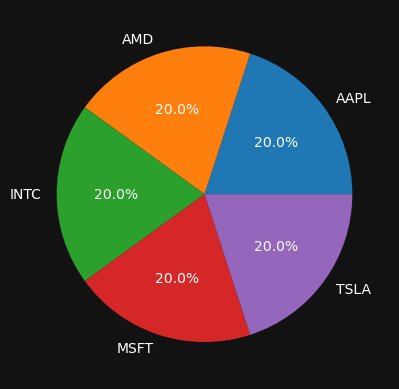

In [9]:
st.subheader('Portfolio Risk:')
pf_std

st.subheader('Benchmark Risk:')
benchmark.pct_change().std()

st.subheader('Portfolio Composition:')
fig, ax = plt.subplots(facecolor = '#121212')
ax.pie(w, labels = relret.columns, autopct='%1.1f%%', textprops= {'color':'white'})

st.pyplot(fig)